In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/healthexp.csv"

In [ ]:
#### getting the data
def read_data():
  data = pd.read_csv(url)
  return data


In [ ]:
## calling the read data functions
df = read_data()
print(df.head())
print(df.info())

   Year        Country  Spending_USD  Life_Expectancy
0  1970        Germany       252.311             70.6
1  1970         France       192.143             72.2
2  1970  Great Britain       123.993             71.9
3  1970          Japan       150.437             72.0
4  1970            USA       326.961             70.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             274 non-null    int64  
 1   Country          274 non-null    object 
 2   Spending_USD     274 non-null    float64
 3   Life_Expectancy  274 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.7+ KB
None


In [ ]:
##### preprocesing and feature engineering
df1 = df.copy()
print(df1)

     Year        Country  Spending_USD  Life_Expectancy
0    1970        Germany       252.311             70.6
1    1970         France       192.143             72.2
2    1970  Great Britain       123.993             71.9
3    1970          Japan       150.437             72.0
4    1970            USA       326.961             70.9
..    ...            ...           ...              ...
269  2020        Germany      6938.983             81.1
270  2020         France      5468.418             82.3
271  2020  Great Britain      5018.700             80.4
272  2020          Japan      4665.641             84.7
273  2020            USA     11859.179             77.0

[274 rows x 4 columns]


In [ ]:
###### exploratory data analysis EDA
df1['Year'].value_counts()

1995    6
2008    6
1998    6
1999    6
2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2009    6
1996    6
2010    6
2011    6
2012    6
2013    6
2014    6
2015    6
2016    6
2017    6
2018    6
2019    6
1997    6
2020    6
1985    6
1993    6
1992    6
1980    6
1990    6
1994    6
1971    5
1981    5
1982    5
1984    5
1983    5
1986    5
1987    5
1988    5
1989    5
1991    5
1970    5
1979    4
1976    4
1975    4
1978    3
1977    3
1974    3
1973    3
1972    3
Name: Year, dtype: int64

<Axes: xlabel='Year', ylabel='Life_Expectancy'>

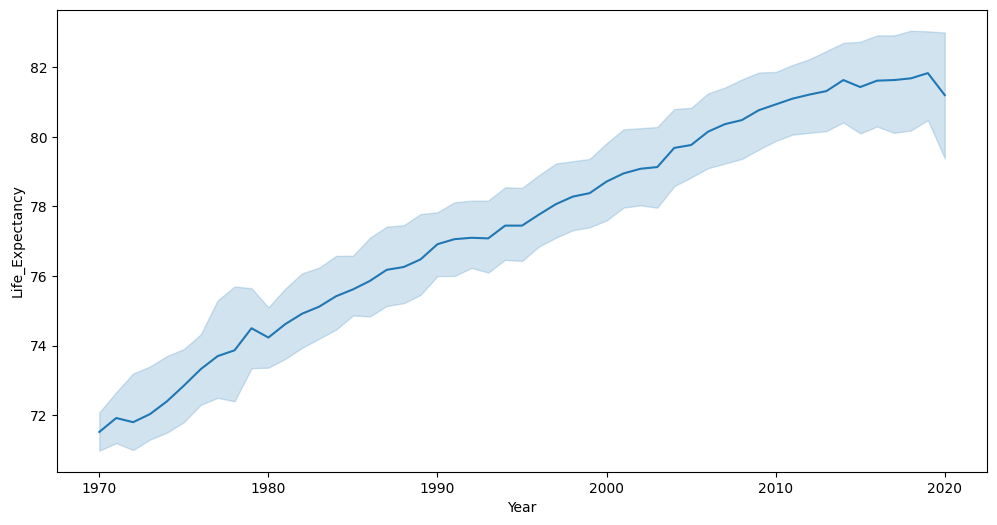

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='Life_Expectancy', data=df1)

In [ ]:
#### interference  --  There is year on year increase int he life expentency value

-0.20233768373091185
count    274.000000
mean      77.909489
std        3.276263
min       70.600000
25%       75.525000
50%       78.100000
75%       80.575000
max       84.700000
Name: Life_Expectancy, dtype: float64


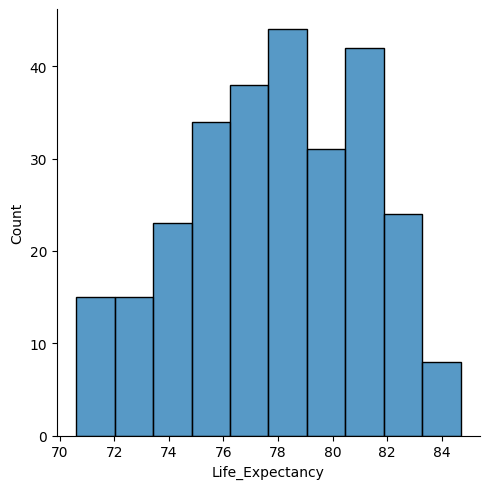

In [ ]:
sns.displot(x=df1['Life_Expectancy'])
print(df1['Life_Expectancy'].skew())
print(df1['Life_Expectancy'].describe())

In [ ]:
###### as we can see the distribution of life expentency is normally distributed.


<Axes: xlabel='Life_Expectancy'>

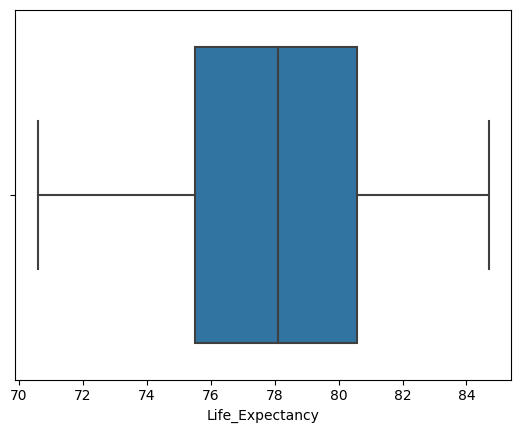

In [ ]:
sns.boxplot(x = df1['Life_Expectancy'])

<Axes: xlabel='Spending_USD', ylabel='Life_Expectancy'>

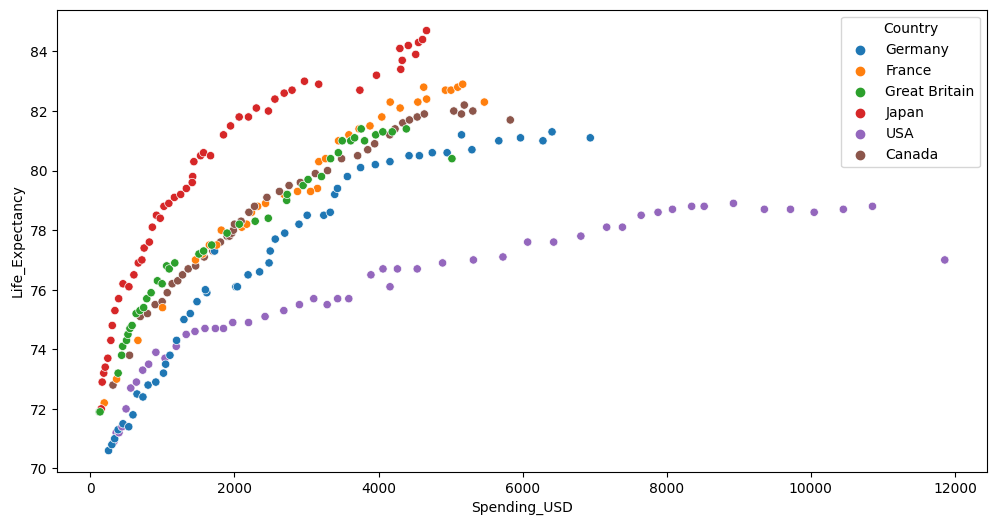

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Spending_USD', y='Life_Expectancy', hue='Country', data=df1)

In [ ]:
df1[['Spending_USD', 'Life_Expectancy']].var()

Spending_USD       4.817761e+06
Life_Expectancy    1.073390e+01
dtype: float64

In [ ]:
df1.shape

(274, 4)

In [ ]:
model_data = df1[['Spending_USD', 'Life_Expectancy']]
model_data

,Spending_USD,Life_Expectancy
0,252.311,70.6
1,192.143,72.2
2,123.993,71.9
3,150.437,72.0
4,326.961,70.9
...,...,...
269,6938.983,81.1
270,5468.418,82.3
271,5018.700,80.4
272,4665.641,84.7


In [ ]:
model_data.corr()

,Spending_USD,Life_Expectancy
Spending_USD,1.00000,0.57943
Life_Expectancy,0.57943,1.00000


In [ ]:
#### sampling the data ----
from sklearn.model_selection import train_test_split

In [ ]:
model_data.shape

(274, 2)

Method 1


In [ ]:
### splittin data in train and test randomly
training, testing = train_test_split(model_data, train_size=0.8)

In [ ]:
training.shape

(219, 2)

In [ ]:
testing.shape

(55, 2)

Method 2


In [ ]:
model_data.shape

(274, 2)

In [ ]:
x=model_data['Spending_USD']
y=model_data['Life_Expectancy']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

In [ ]:
x_train.shape, y_train.shape

((219,), (219,))

In [ ]:
x_test.shape, y_test.shape

((55,), (55,))

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x_train = x_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

In [ ]:
model = LinearRegression()
model_fit = model.fit(x_train, y_train)

In [ ]:
model_fit.coef_

array([[0.00086078]])

In [ ]:
model_fit.intercept_

array([75.47456239])

In [ ]:
x_test = x_test.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [ ]:
pred = model_fit.predict(x_test)
pred

In [ ]:
df_pred = pd.DataFrame(pred, columns=['Pred'])

In [ ]:
df_pred['Actual'] = y_test

In [ ]:
df_pred

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

In [ ]:
r2_score(df_pred['Actual'],df_pred['Pred'])

0.3241716663866976

In [ ]:
mean_squared_error(df_pred['Actual'],df_pred['Pred'])

8.524454005691126

In [ ]:
sqrt(mean_squared_error(df_pred['Actual'],df_pred['Pred']))

2.919666762781521

In [ ]:
df['Country'].unique()

array(['Germany', 'France', 'Great Britain', 'Japan', 'USA', 'Canada'],
      dtype=object)

In [ ]:
#### converting the textual col to umerical col is called encoding

In [ ]:
d = {'Germany':0, 'France':1, 'Great Britain':2, 'Japan':3, 'USA':4, 'Canada':5}
d

{'Germany': 0,
 'France': 1,
 'Great Britain': 2,
 'Japan': 3,
 'USA': 4,
 'Canada': 5}

In [ ]:
df1['country_map'] = df1['Country'].map(d)

In [ ]:
df1

,Year,Country,Spending_USD,Life_Expectancy,country_map
0,1970,Germany,252.311,70.6,0
1,1970,France,192.143,72.2,1
2,1970,Great Britain,123.993,71.9,2
3,1970,Japan,150.437,72.0,3
4,1970,USA,326.961,70.9,4
...,...,...,...,...,...
269,2020,Germany,6938.983,81.1,0
270,2020,France,5468.418,82.3,1
271,2020,Great Britain,5018.700,80.4,2
272,2020,Japan,4665.641,84.7,3


In [ ]:
df1.drop('country_map', axis=1, inplace=True)

In [ ]:
df1

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9
...,...,...,...,...
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4
272,2020,Japan,4665.641,84.7


In [ ]:
#### on hot encoding
dumm = pd.get_dummies(df1['Country']).astype('int')

In [ ]:
final_data = pd.concat([df1, dumm], axis =1)

In [ ]:
final_data

,Year,Country,Spending_USD,Life_Expectancy,Canada,France,Germany,Great Britain,Japan,USA
0,1970,Germany,252.311,70.6,0,0,1,0,0,0
1,1970,France,192.143,72.2,0,1,0,0,0,0
2,1970,Great Britain,123.993,71.9,0,0,0,1,0,0
3,1970,Japan,150.437,72.0,0,0,0,0,1,0
4,1970,USA,326.961,70.9,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
269,2020,Germany,6938.983,81.1,0,0,1,0,0,0
270,2020,France,5468.418,82.3,0,1,0,0,0,0
271,2020,Great Britain,5018.700,80.4,0,0,0,1,0,0
272,2020,Japan,4665.641,84.7,0,0,0,0,1,0


In [ ]:
final_data.columns

Index(['Year', 'Country', 'Spending_USD', 'Life_Expectancy', 'Canada',
       'France', 'Germany', 'Great Britain', 'Japan', 'USA'],
      dtype='object')

In [ ]:
X = final_data[['Spending_USD', 'Canada', 'France', 'Germany', 'Great Britain', 'Japan', 'USA']]
X.head()

,Spending_USD,Canada,France,Germany,Great Britain,Japan,USA
0,252.311,0,0,1,0,0,0
1,192.143,0,1,0,0,0,0
2,123.993,0,0,0,1,0,0
3,150.437,0,0,0,0,1,0
4,326.961,0,0,0,0,0,1


In [ ]:
y = final_data['Life_Expectancy']
y.head()

0    70.6
1    72.2
2    71.9
3    72.0
4    70.9
Name: Life_Expectancy, dtype: float64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8)

In [ ]:
x_train.head(2)

,Spending_USD,Canada,France,Germany,Great Britain,Japan,USA
112,1962.196,1,0,0,0,0,0
214,4228.962,1,0,0,0,0,0


In [ ]:
model_train = model.fit(x_train, y_train)

In [ ]:
pred1 = model_train.predict(x_test)
pred1

array([76.4941193 , 77.72562983, 82.00803563, 83.43196469, 79.1474642 ,
       78.11884638, 75.80650496, 75.64114594, 74.35301579, 73.45565659,
       73.81084888, 84.46001207, 76.25390434, 79.7583851 , 75.56061199,
       82.45744024, 79.51316821, 77.14619673, 82.7078135 , 77.16108973,
       76.56000144, 80.74563689, 78.19960778, 77.97794809, 79.89719936,
       78.06818183, 80.93250629, 83.94648586, 75.94556827, 80.11004797,
       76.13486089, 82.37035588, 77.16285362, 78.76598446, 82.89852537,
       78.13477815, 75.35044399, 82.01735165, 81.68178592, 80.78210263,
       76.47380855, 80.38043489, 77.21099497, 81.82122613, 82.5773083 ,
       78.9801446 , 76.81322309, 81.81672711, 78.2015505 , 77.12892663,
       78.26762142, 76.72914215, 78.79511763, 80.39509994, 81.0307398 ])

In [ ]:
dd1 = pd.DataFrame(pred1, columns=['Predicted'])

In [ ]:
dd1['Actual'] = y_test.values

In [ ]:
sqrt(mean_squared_error(dd1['Actual'], dd1['Predicted']))

1.9526755031586058

In [ ]:
r2_score(dd1['Actual'], dd1['Predicted'])  #### accuracy or strength of the model

0.6312782147361811